# Simple Neural Implementation of Iterative MAP Calculation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [2]:
# True Statistics
v_mean = 3
v_sigma = 1.0
u_sigma = 2

v_p = 3
Sigma_p = 1.0
Sigma_u = 2.0

def g(v):
    return np.square(v)

def dg(v):
    return 2*v

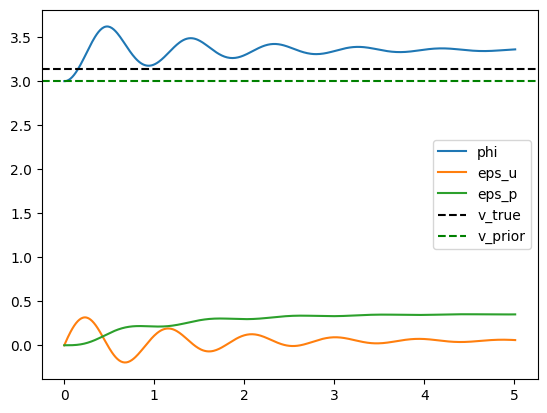

In [30]:
v = np.random.normal(v_mean, np.sqrt(v_sigma))
u = np.random.normal(g(v), np.sqrt(u_sigma))
def simulate(max_t=5, dt=0.01, lr=0.01):

    ts = [0.0]
    phis = [v_p]
    eps_us = [0]
    eps_ps = [0]

    while ts[-1] < max_t:
        deps_u = u - g(phis[-1]) - Sigma_u*eps_us[-1]
        deps_p = phis[-1] - v_p - Sigma_p*eps_ps[-1]
        dphi = eps_us[-1]*dg(phis[-1]) - eps_ps[-1]

        eps_us.append(eps_us[-1] + lr * deps_u)
        eps_ps.append(eps_ps[-1] + lr * deps_p)
        phis.append(phis[-1] + lr * dphi)
        ts.append(ts[-1] + dt)
    
    return ts, phis, eps_us, eps_ps

ts, phis, eps_us, eps_ps = simulate()

plt.plot(ts, phis, label='phi')
plt.plot(ts, eps_us, label='eps_u')
plt.plot(ts, eps_ps, label='eps_p')
plt.axhline(v, color='k', linestyle='--', label='v_true')
plt.axhline(v_p, color='g', linestyle='--', label='v_prior')
plt.legend()
plt.show()